In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import *
from matplotlib.cm import jet
import pandas as pd

plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams["font.size"] = 20
plt.style.use(["dark_background"])

# plt.rcParams.keys()

# Importing the data, part b

y = columns: y_0, y_1,...,y_15
Y = rows: Y_0, Y_1,...,Y_1000
A = (Y_0, Y_1, Y_2,...,Y_1000)

In [2]:
def data_loader():
    samples = pd.read_csv("csv-map/samples.csv", delimiter=",")
    train_data = pd.read_csv("csv-map/train_ts.csv", delimiter=",")
    theta = samples.to_numpy()
    X = train_data.to_numpy()
    return X, theta 

X, theta = data_loader()
X.shape, theta.shape

((9999, 201), (9999, 15))

$\mathbf{X}$ is the training data $(9999, 201)$ and $\mathbf{\theta}$ is the targets $(9999,15)$.
Our goal is to find the parameters $\mathbf{W}$, a $(15, 201)$ matrix such that the $l_2$-norm is minimized.\
Let's try with least-squares-method for the following equation:
$$\mathbf{X W} = \mathbf{\theta}$$
We get \
$$
\mathbf{W} = (\mathbf{X^T X})^{-1} \mathbf{X^T\theta}$$

## Exploring the data

In [3]:
alpha_a, alpha_ap, alpha_r, alpha_rp, beta_a, beta_r, delta_ma, delta_mr, delta_a, delta_r, gamma_a, gamma_r, gamma_c, theta_a, theta_r = theta.T

(Text(0, 0.5, 'uniform sample range'), Text(0.5, 0, 'sample size'))

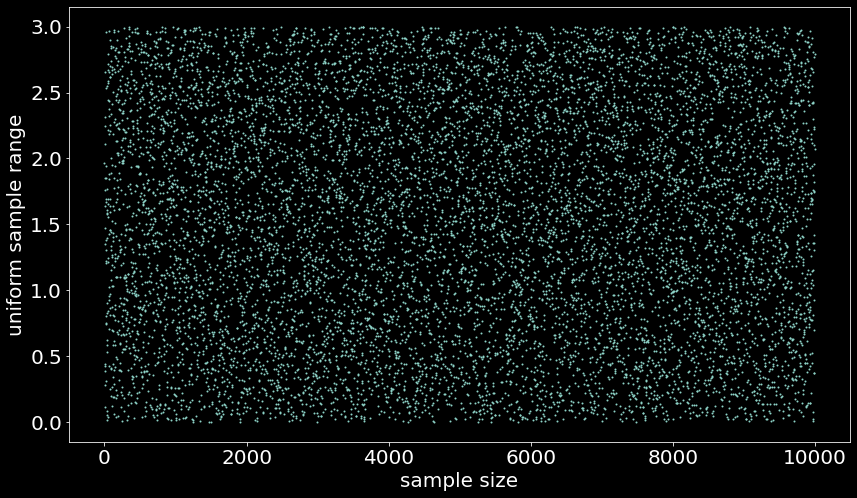

In [4]:
plt.plot(gamma_c, "o", ms=1)
plt.ylabel("uniform sample range"), plt.xlabel("sample size")

## Results from different runs, part b

(Text(0.5, 0, 'time steps'), Text(0, 0.5, 'quantity of the protein'))

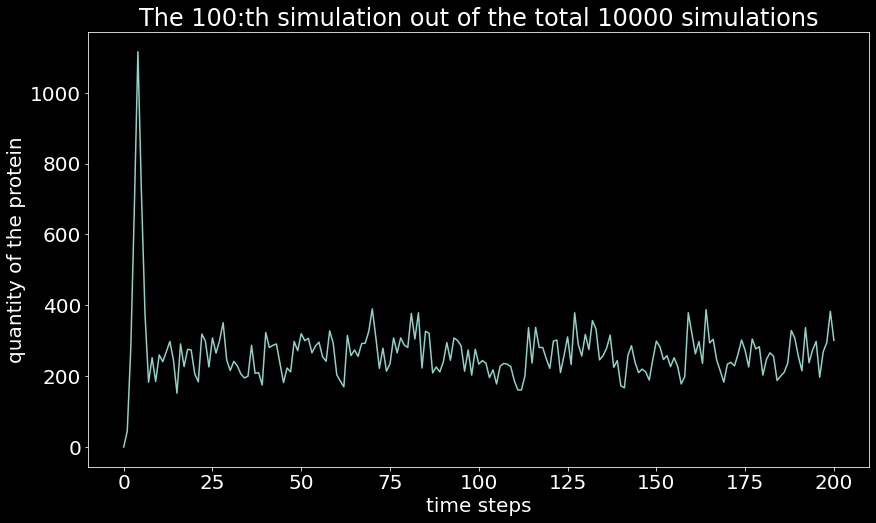

In [5]:
i = 100
plt.plot(X[i])
plt.title(f"The {i}:th simulation out of the total 10000 simulations")
plt.xlabel("time steps"), plt.ylabel("quantity of the protein")

In [9]:
print("condition number:", cond(X).round(0)) 

condition number: inf


# Solving for the parameters, part c

In [11]:
W_normal = inv(X.T @ X) @ X.T @ theta

LinAlgError: Singular matrix

In [13]:
Q, R = qr(X, mode="reduced") 
Q.shape, R.shape

((9999, 201), (201, 201))

In [14]:
print("condition number with QR:", cond(R).round(0))

condition number with QR: inf


Solving $\omega$ with QR-factorization

In [16]:
W_pinv = pinv(X)@theta
W_pinv.shape

(201, 15)

## plotting the value dependencies of each parameter

Text(0, 0.5, 'magnitude of the parameters')

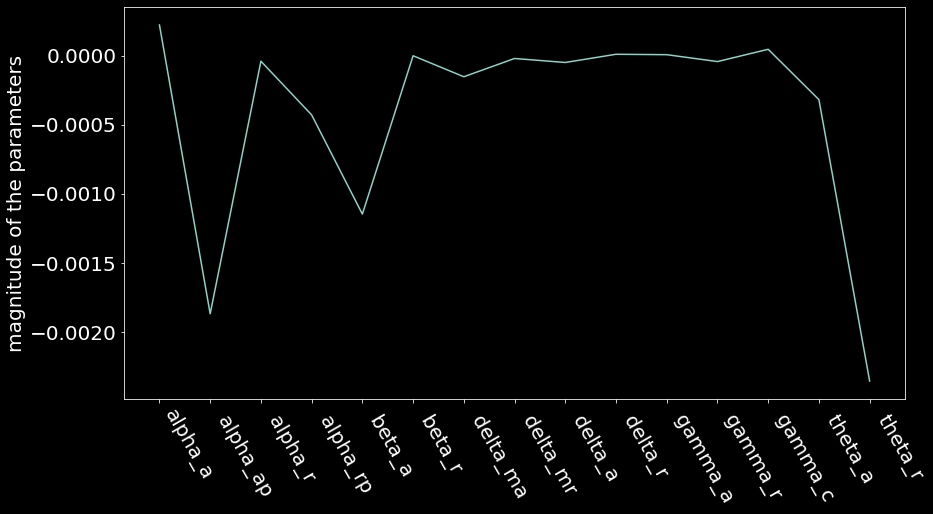

In [18]:
labels = "alpha_a, alpha_ap, alpha_r, alpha_rp, beta_a, beta_r, delta_ma, delta_mr, delta_a, delta_r, gamma_a, gamma_r, gamma_c, theta_a, theta_r"
parameter_labels = [word for word in labels.split(sep=",")]

fig, ax = plt.subplots(figsize=(14, 8))

j = np.random.choice(range(14)) # choose between 0 - 14
ax.plot(parameter_labels, W_pinv[j]) 
fig.autofmt_xdate(rotation=-60, ha="left")
ax.set_ylabel("magnitude of the parameters")

## plotting the time evolution of each parameter

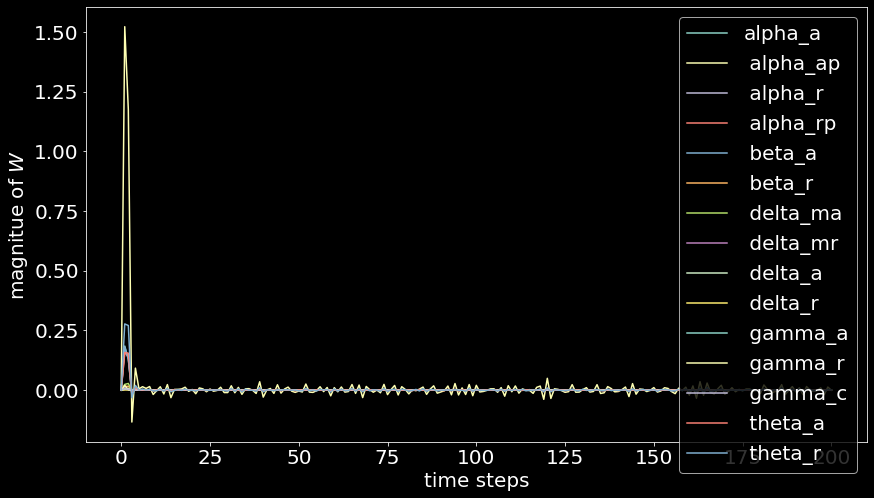

In [21]:
[plt.plot(W_pinv[:,i], label=f"{parameter_labels[i]}") 
 for i in range(15)
] 
plt.legend()
plt.xlabel("time steps"), plt.ylabel("magnitue of $W$");

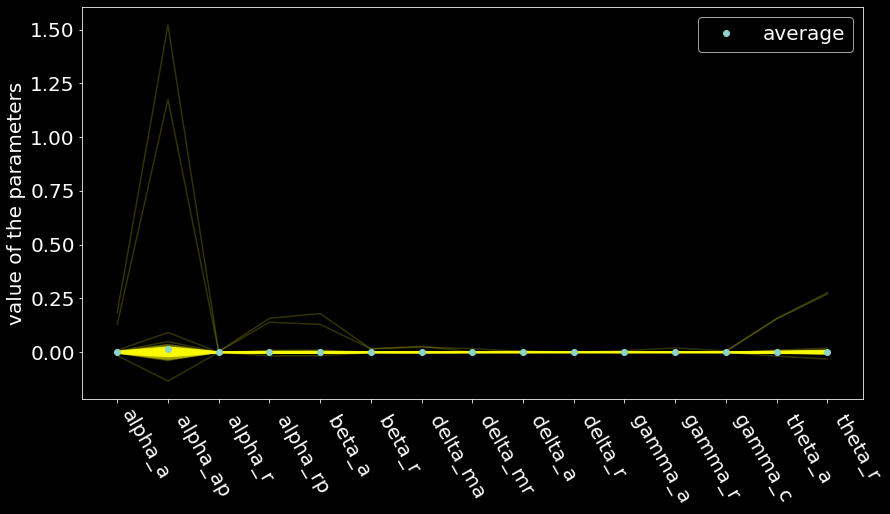

In [49]:
fig, ax = plt.subplots()
labels = "alpha_a, alpha_ap, alpha_r, alpha_rp, beta_a, beta_r, delta_ma, delta_mr, delta_a, delta_r, gamma_a, gamma_r, gamma_c, theta_a, theta_r"
parameter_labels = [word for word in labels.split(sep=",")]

for i in range(1, 201): 
    ax.plot(W_pinv[i], "-", color="yellow", ms=8, alpha=0.2)
ax.plot(parameter_labels, W_pinv.mean(0), "o", lw=3, label="average")    
fig.autofmt_xdate(rotation=-60, ha="left")
ax.set_ylabel("value of the parameters")
ax.legend()
# fig.savefig("Distribution of the parameters w.r.t time.png")

In [55]:
df = pd.DataFrame(np.round(W_pinv.mean(0), 6), index=parameter_labels)
# df.to_csv("average values for the parameters.csv")
df

,0
alpha_a,0.001550
alpha_ap,0.013355
alpha_r,0.000031
alpha_rp,0.001461
beta_a,0.001528
beta_r,0.000157
delta_ma,0.000251
delta_mr,0.000086
delta_a,0.000046
delta_r,0.000008


# Comparing the fit against the trainning data, part d

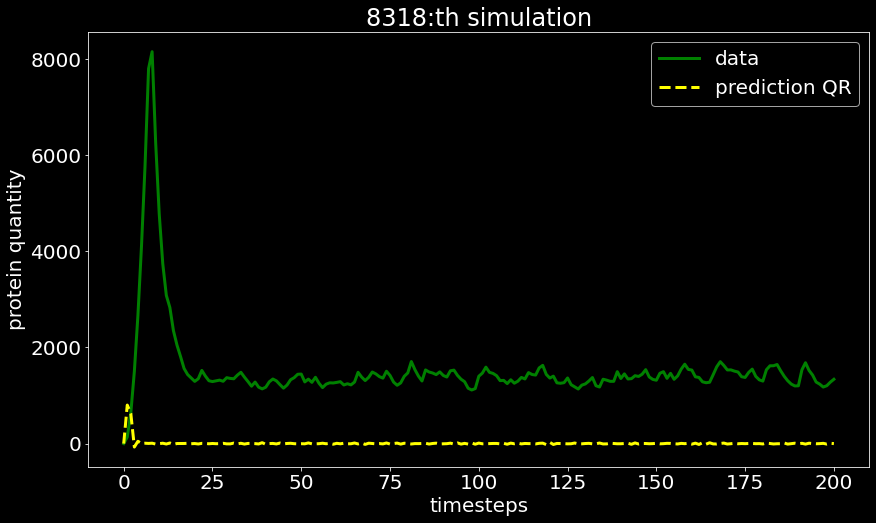

In [89]:
i = np.random.choice(range(10000))
plt.title(f"{i}:th simulation")
plt.plot(X[i], label="data", color="green", lw=3)
plt.plot(theta[i]@W_pinv.T, "--", color="yellow", lw=3, label="prediction QR")
plt.xlabel("timesteps"), plt.ylabel("protein quantity")
plt.legend()
plt.savefig(f"figures for part d\simulation number {i}.png");
